In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
cd ../SP_ANALYSIS/

/home/jordan/rna-is-awesome/SP_ANALYSIS


In [4]:
import SPTools

In [5]:
df1 = SPTools.build_tables("/home/jordan/SeqData/JEB002/JEB002count_cleavages_at_annotated_splice_sites.txt", header=[0,1], skiprows=[2])

In [6]:
df2  = SPTools.build_tables("/home/jordan/SeqData/JEB002/JEB002count_reads_in_transcripts.txt")

In [7]:
df3 = SPTools.build_tables("/home/jordan/SeqData/JEB002/JEB002count_exonic_reads.txt")

In [8]:
lengths_df = SPTools.build_tables("/home/jordan/rna-is-awesome/H99_transcript_lengths.txt")

In [9]:
config_tbl = SPTools.build_tables("/home/jordan/SeqData/JEB002/JEB002totalalignedreads.tbl")

In [12]:
normalized_ss_counts = SPTools.normalize_AtoB(df1, df2, lengths_df, config_tbl)

Reading sample 150904CM763-A
Control value 1 = 3331821
Control value 2 = 18487092
Control value 3 = 1360821
Reading sample 150904CM764-A
Control value 1 = 4221804
Control value 2 = 5068674
Control value 3 = 1360821
Reading sample 150904CM018-A
Control value 1 = 153464
Control value 2 = 482785
Control value 3 = 19334073
Reading table
5prime Normalized; 3prime Normalized
44180
7719


In [13]:
normalized_ss_counts_cutoff = SPTools.normalize_AtoB(df1, df2, lengths_df, config_tbl, 400)

Reading sample 150904CM763-A
Control value 1 = 3331821
Control value 2 = 18487092
Control value 3 = 1360821
Reading sample 150904CM764-A
Control value 1 = 4221804
Control value 2 = 5068674
Control value 3 = 1360821
Reading sample 150904CM018-A
Control value 1 = 153464
Control value 2 = 482785
Control value 3 = 19334073
Reading table
5prime Normalized; 3prime Normalized
590
101


In [14]:
RNAi_targets_counts = SPTools.filter_transcripts_by_cnag(normalized_ss_counts, "/home/jordan/rna-is-awesome/H99_RNAi_targets.txt")

44180
383


150904CM763
5prime Normalized
-0.355777910664
3.15172251246


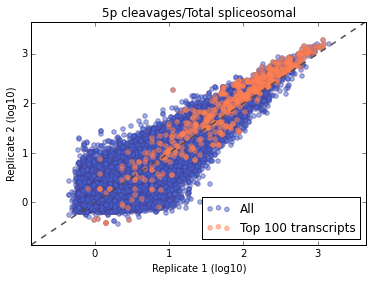

In [18]:
fig1 = SPTools.scatter_plot2(("150904CM763","5prime Normalized"),("150904CM764","5prime Normalized"), normalized_ss_counts, normalized_ss_counts_cutoff, plot_title='5p cleavages/Total spliceosomal', legend2='Top 100 transcripts')

In [14]:
fig1.savefig("/home/jordan/Desktop/SPgrant/JEB002_A5p_vs_B_scatter.svg", format="svg")

In [15]:
mature_df = SPTools.normalize_B_to_mature(df2,lengths_df,config_tbl)

Reading sample 150904CM018-B
Control value 1 = 153464
Control value 2 = 482785
Control value 3 = 19334073
Reading sample 150904CM763-B
Control value 1 = 3331821
Control value 2 = 18487092
Control value 3 = 1360821
Reading sample 150904CM764-B
Control value 1 = 4221804
Control value 2 = 5068674
Control value 3 = 1360821
Normalized to mature
7809


In [16]:
mature_df_cutoff = SPTools.normalize_B_to_mature(df2,lengths_df,config_tbl,cutoff=400)

Reading sample 150904CM018-B
Control value 1 = 153464
Control value 2 = 482785
Control value 3 = 19334073
Reading sample 150904CM763-B
Control value 1 = 3331821
Control value 2 = 18487092
Control value 3 = 1360821
Reading sample 150904CM764-B
Control value 1 = 4221804
Control value 2 = 5068674
Control value 3 = 1360821
Normalized to mature
102


In [17]:
RNAi_targets_mature = SPTools.filter_transcripts_by_cnag(mature_df, "/home/jordan/rna-is-awesome/H99_RNAi_targets2.txt")

7809
62


In [18]:
reload(SPTools)

<module 'SPTools' from 'SPTools.pyc'>

In [19]:
normalized_exons = SPTools.normalize_B_to_mature(df3, lengths_df, config_tbl, untagged="150904CM018")

Reading sample 150904CM018-B
Control value 1 = 153464
Control value 2 = 482785
Control value 3 = 19334073
Reading sample 150904CM763-B
Control value 1 = 3331821
Control value 2 = 18487092
Control value 3 = 1360821
Reading sample 150904CM764-B
Control value 1 = 4221804
Control value 2 = 5068674
Control value 3 = 1360821
Normalized to mature
7813


In [20]:
normalized_exons_cutoff = SPTools.normalize_B_to_mature(df3, lengths_df, config_tbl, cutoff=350)

Reading sample 150904CM018-B
Control value 1 = 153464
Control value 2 = 482785
Control value 3 = 19334073
Reading sample 150904CM763-B
Control value 1 = 3331821
Control value 2 = 18487092
Control value 3 = 1360821
Reading sample 150904CM764-B
Control value 1 = 4221804
Control value 2 = 5068674
Control value 3 = 1360821
Normalized to mature
102


In [21]:
RNAi_targets_exons = SPTools.filter_transcripts_by_cnag(normalized_exons, "/home/jordan/rna-is-awesome/H99_RNAi_targets2.txt")

7813
62


150904CM763
Normalized to mature
-1.46741693894
1.66419994099


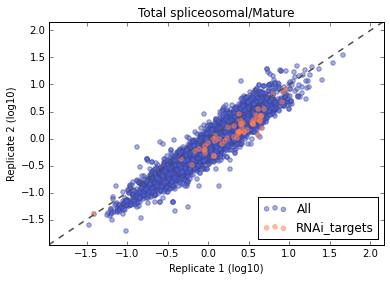

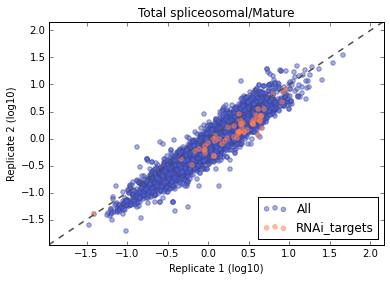

In [22]:
SPTools.scatter_plot2(("150904CM763","Normalized to mature"),("150904CM764","Normalized to mature"), mature_df, RNAi_targets_mature, plot_title='Total spliceosomal/Mature', legend2='RNAi_targets')

150904CM763
Normalized to mature
1.0782999255
7.79670843068


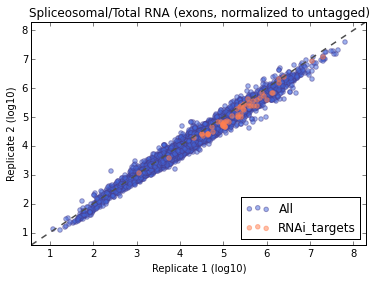

In [23]:
fig2 = SPTools.scatter_plot2(("150904CM763","Normalized to mature"),("150904CM764","Normalized to mature"), normalized_exons, RNAi_targets_exons, plot_title='Spliceosomal/Total RNA (exons, normalized to untagged)', legend2='RNAi_targets')

In [24]:
fig2.savefig("/home/jordan/Desktop/SPgrant/JEB002_Bexons_vs_mature_scatter.svg", format="svg")

In [25]:
RNAi_list = ["CNAG_03387T0", "CNAG_04060T0", "CNAG_07421T0", "CNAG_00903T0", "CNAG_06757T0", "CNAG_06844T0", "CNAG_05212T0", "CNAG_00128T0", "CNAG_04590T0", "CNAG_05185T0", "CNAG_07684T0"]

In [26]:
other_list = ["CNAG_06699T0","CNAG_00483T0", "CNAG_00147T0", "CNAG_05894T0", "CNAG_02714T0", "CNAG_03739T0"]

In [27]:
reload(SPTools)

<module 'SPTools' from 'SPTools.pyc'>

[<matplotlib.axis.XAxis object at 0x7f5aca524750>, <matplotlib.axis.YAxis object at 0x7f5aca650bd0>, <matplotlib.lines.Line2D object at 0x7f5aca3cde50>, <matplotlib.lines.Line2D object at 0x7f5aca3d70d0>, <matplotlib.patches.Rectangle object at 0x7f5aca46e590>, <matplotlib.patches.Rectangle object at 0x7f5aca5bd1d0>, <matplotlib.patches.Rectangle object at 0x7f5aca47c250>, <matplotlib.patches.Rectangle object at 0x7f5aca47c8d0>, <matplotlib.patches.Rectangle object at 0x7f5aca47cf50>, <matplotlib.patches.Rectangle object at 0x7f5aca489610>, <matplotlib.patches.Rectangle object at 0x7f5aca489c90>, <matplotlib.patches.Rectangle object at 0x7f5aca416350>, <matplotlib.patches.Rectangle object at 0x7f5aca4169d0>, <matplotlib.patches.Rectangle object at 0x7f5aca416ed0>, <matplotlib.patches.Rectangle object at 0x7f5aca426710>, <matplotlib.patches.Rectangle object at 0x7f5aca426d90>, <matplotlib.patches.Rectangle object at 0x7f5aca431450>, <matplotlib.patches.Rectangle object at 0x7f5aca431ad0

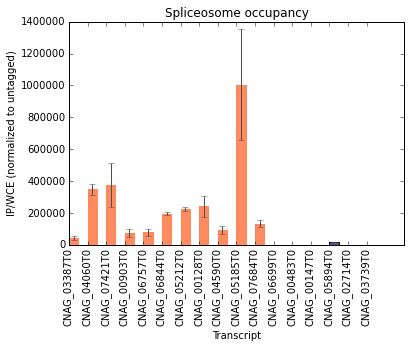

In [28]:
fig3 = SPTools.bar_chart(normalized_exons, "Normalized to mature", "150904CM763", "150904CM764", RNAi_list, CNAG_list2=other_list, plot_title="Spliceosome occupancy", ylabel="IP/WCE (normalized to untagged)")

In [29]:
fig3.savefig("/home/jordan/Desktop/SPgrant/JEB002_Bexons_vs_mature_bar.svg", format="svg")

In [30]:
normalized_ss_counts = SPTools.normalize_AtoB(df1, df2, lengths_df, config_tbl, untagged="150904CM018")

Reading sample 150904CM763-A
Control value 1 = 3331821
Control value 2 = 18487092
Control value 3 = 1360821
Reading sample 150904CM764-A
Control value 1 = 4221804
Control value 2 = 5068674
Control value 3 = 1360821
Reading sample 150904CM018-A
Control value 1 = 153464
Control value 2 = 482785
Control value 3 = 19334073
Reading table
5prime Normalized; 3prime Normalized
44180
7719


In [ ]:
fig4 = SPTools.bar_chart(normalized_exons, "Normalized to mature", "150904CM763", "150904CM764", RNAi_list, CNAG_list2=other_list, plot_title="Spliceosome occupancy", ylabel="A/B (normalized to untagged)")